In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import re
import scIB
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
raw_data_dir = "/storage/groups/ml01/projects/2019_scIB_daniel.strobl_michaela.mueller/TM/"
data_dir = "/storage/groups/ml01/workspace/group.daniela/tm/"

In [3]:
relevant_tissues = {'Bladder', 'Brain', 'Kidney', 'Liver', 'Lung', 'Mammary_Gland',
 'Marrow', 'Limb_Muscle', 'Pancreas', 'Spleen', 'Thymus'}
len(relevant_tissues)

11

## Read Data

In [4]:
dropletDirs = glob.glob(raw_data_dir+"10X/droplet/*")
filteredDirs = [i for i in dropletDirs if any(substr in i for substr in relevant_tissues)]

In [5]:
# merge by cell type
adatas = {}
for file_name in filteredDirs:
    tmp = sc.read_10x_mtx(file_name, cache=True, make_unique=False)
    ids = file_name.split("/")[-1].split("-")
    tissue = ids[0]
    print(tissue)
    
    tmp.obs['tissue'] = [tissue]*tmp.n_obs
    tmp.obs['channel'] = [ids[1]]*tmp.n_obs
    
    if tissue in adatas:
        adatas[tissue] = adatas[tissue].concatenate(tmp, index_unique=None)
        adatas[tissue]
    else:
        adatas[tissue] = tmp

Thymus
Kidney
Limb_Muscle
Lung
Kidney


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Kidney


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Bladder
Liver


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Liver
Marrow
Mammary_Gland
Spleen
Bladder
Bladder


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Lung


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Lung


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Spleen


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Limb_Muscle


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Lung


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Mammary_Gland


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


Liver
Marrow


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


In [6]:
adatas

{'Thymus': AnnData object with n_obs × n_vars = 1431 × 23433 
     obs: 'tissue', 'channel'
     var: 'gene_ids',
 'Kidney': AnnData object with n_obs × n_vars = 2782 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Limb_Muscle': AnnData object with n_obs × n_vars = 4543 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Lung': AnnData object with n_obs × n_vars = 1476710 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Bladder': AnnData object with n_obs × n_vars = 2500 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Liver': AnnData object with n_obs × n_vars = 1924 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Marrow': AnnData object with n_obs × n_vars = 4112 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Mammary_Gland': AnnData object with n_obs × n_vars = 4481 × 23433 
     obs: 'batch', 'channel', 'tissue'
     var: 'gene_ids',
 'Spleen': A

## Annotation

In [7]:
anno = pd.read_csv(raw_data_dir+"10X/annotations_droplet.csv")

/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
anno.head()

,cell,cell_ontology_class,cell_ontology_id,channel,cluster.ids,free_annotation,mouse.id,mouse.sex,subsetA,subsetA_cluster.ids,subsetB,subsetB_cluster.ids,subtissue,tissue,tissue_tSNE_1,tissue_tSNE_2
0,10X_P7_8_AAACGGGAGGATATAC,myeloid cell,CL:0000763,10X_P7_8,20,dendritic cells and interstital macrophages,3-F-56,F,NaN,NaN,NaN,NaN,NaN,Lung,17.024721,-32.902836
1,10X_P7_8_AAACGGGTCTCGTATT,alveolar macrophage,CL:0000583,10X_P7_8,5,NaN,3-F-56,F,NaN,NaN,NaN,NaN,NaN,Lung,25.160619,25.066566
2,10X_P7_8_AAAGATGCAGATCTGT,B cell,CL:0000236,10X_P7_8,12,NaN,3-F-56,F,NaN,NaN,NaN,NaN,NaN,Lung,1.740567,46.488878
3,10X_P7_8_AAATGCCAGATAGTCA,natural killer cell,CL:0000623,10X_P7_8,7,NaN,3-F-56,F,NaN,NaN,NaN,NaN,NaN,Lung,-31.647934,-2.208061
4,10X_P7_8_AAATGCCCAAACTGCT,T cell,CL:0000084,10X_P7_8,21,NaN,3-F-56,F,NaN,NaN,NaN,NaN,NaN,Lung,-37.281266,-5.619565


In [9]:
# add annotation for each tissue
for tissue in adatas.keys():
    adata = adatas[tissue]
    print(tissue)
    adata.obs_names, _ = adata.obs_names.str.split("-",1).str
    adata.obs['cell'] = ['_'.join(x) for x in zip(adata.obs['channel'], adata.obs_names)]
    obs_merged = pd.merge(adata.obs,
                          anno[['cell', 'mouse.id', 'mouse.sex', 'cell_ontology_class']], 
                          how='left', on='cell')
    obs_merged.rename(columns={'mouse.sex':'sex', 
                               'mouse.id':'sample',
                               'cell_ontology_class':'cell_type'},
                      inplace=True)
    obs_merged.drop(columns=['cell'], inplace=True)
    obs_merged.set_index(adata.obs.index, inplace=True)
    
    adata.obs = obs_merged

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Thymus
Kidney
Limb_Muscle


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Lung


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Bladder
Liver
Marrow


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Mammary_Gland
Spleen


### Most of the ca. 1.5M lung cells are annotated as 'nan'

In [10]:
adata = adatas['Lung']
adata[adata.obs["cell_type"].isnull()]

View of AnnData object with n_obs × n_vars = 1471306 × 23433 
    obs: 'batch', 'channel', 'tissue', 'sample', 'sex', 'cell_type'
    var: 'gene_ids'

In [11]:
sum(adata.obs["cell_type"].notnull())

5404

In [12]:
adata.obs["cell_type"].value_counts()

stromal cell                                       2540
natural killer cell                                 824
lung endothelial cell                               462
alveolar macrophage                                 345
T cell                                              247
non-classical monocyte                              220
B cell                                              204
classical monocyte                                  161
leukocyte                                           152
type II pneumocyte                                   89
myeloid cell                                         87
ciliated columnar cell of tracheobronchial tree      49
mast cell                                            24
Name: cell_type, dtype: int64

In [13]:
anno[anno['tissue']=='Lung'].shape

(5449, 16)

## QC

In [14]:
plt.rcParams['figure.figsize'] = 8,8

Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.


Thymus
2 cells with cell type 'nan' removed


... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'sex' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use 

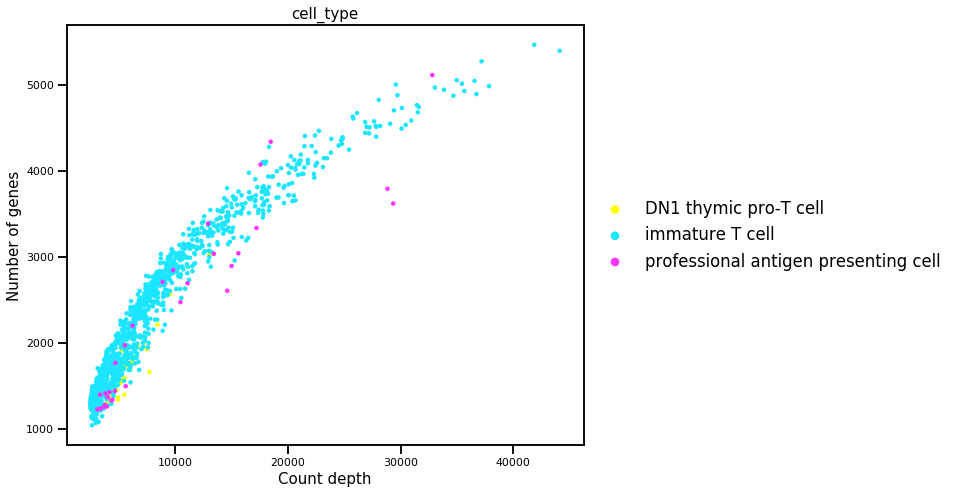

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Kidney
1 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

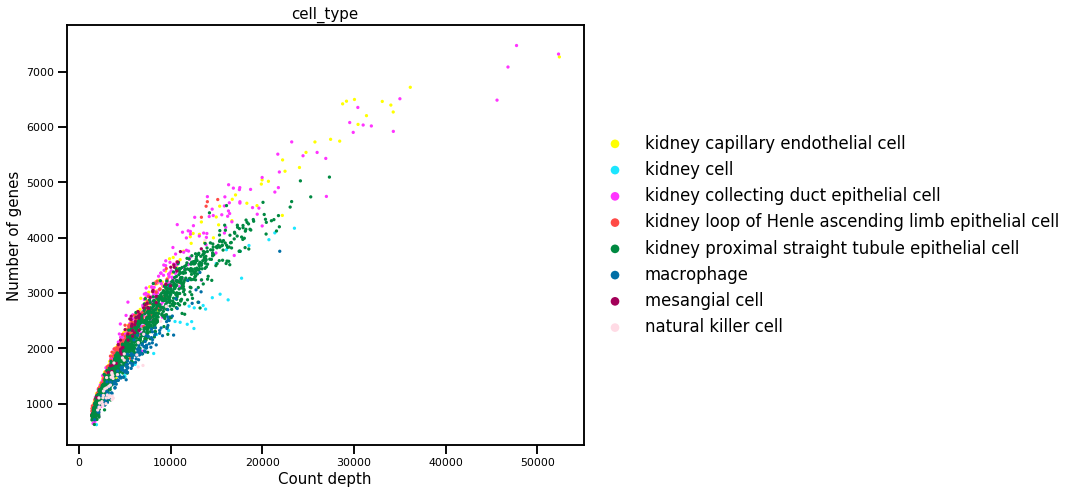

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Limb_Muscle
634 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

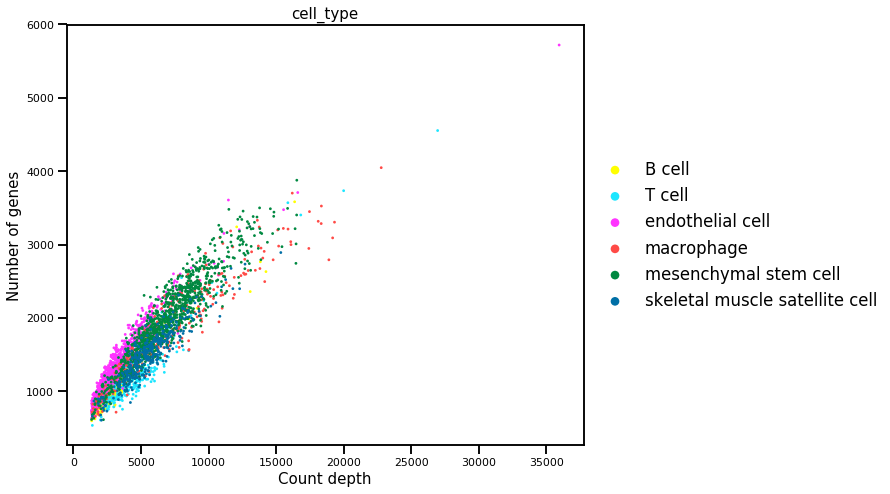

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Lung
1471306 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

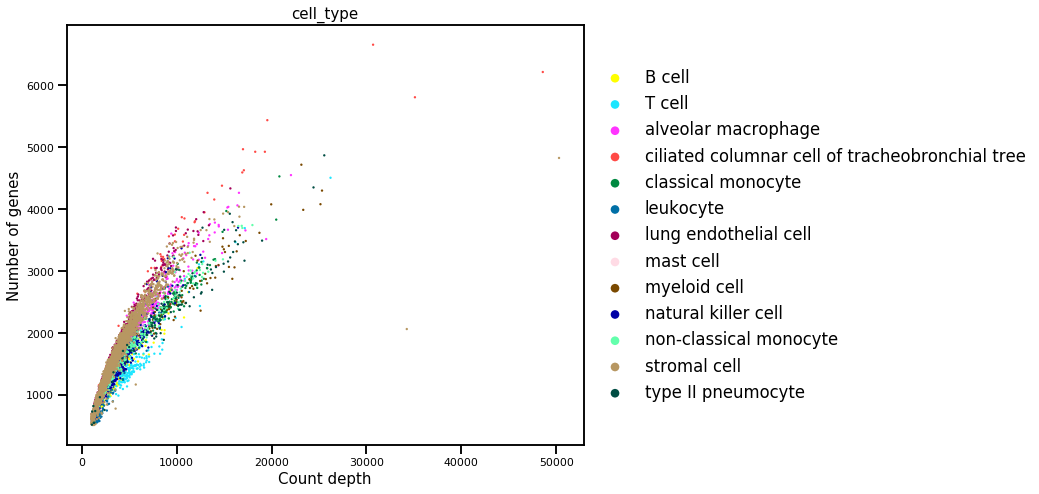

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Bladder


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

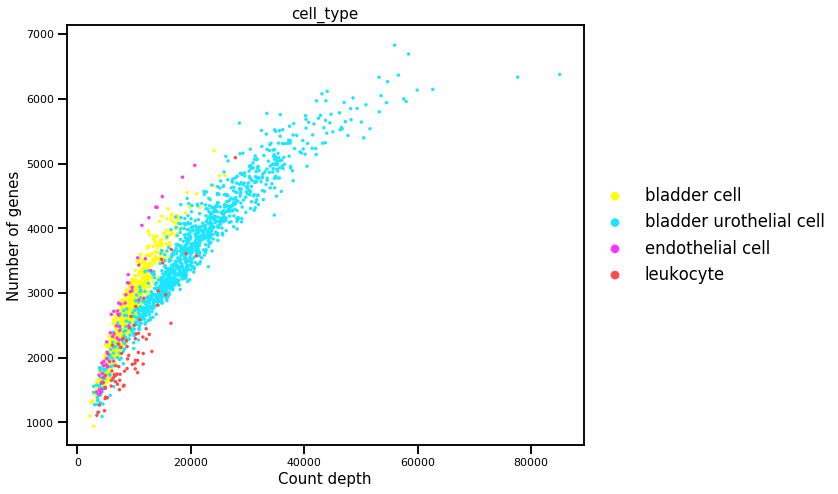

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.


Liver
79 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sex' as categorical
Tryin

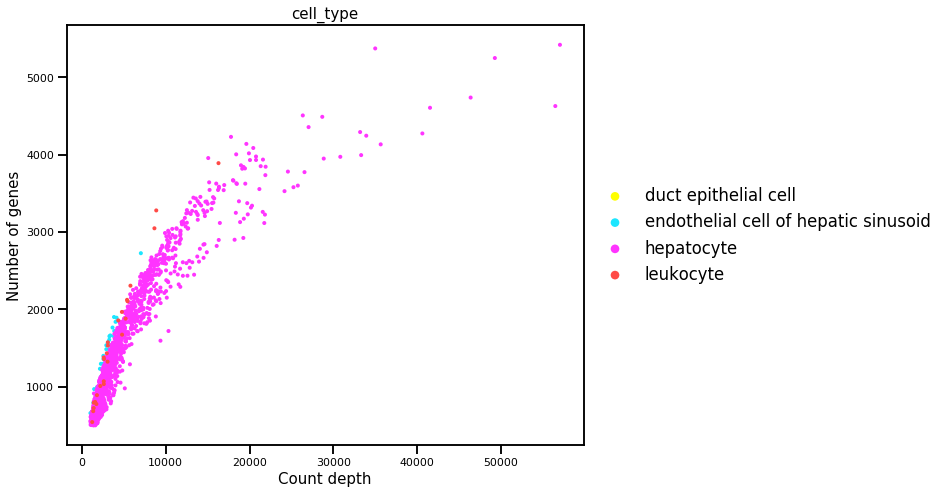

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Marrow
460 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

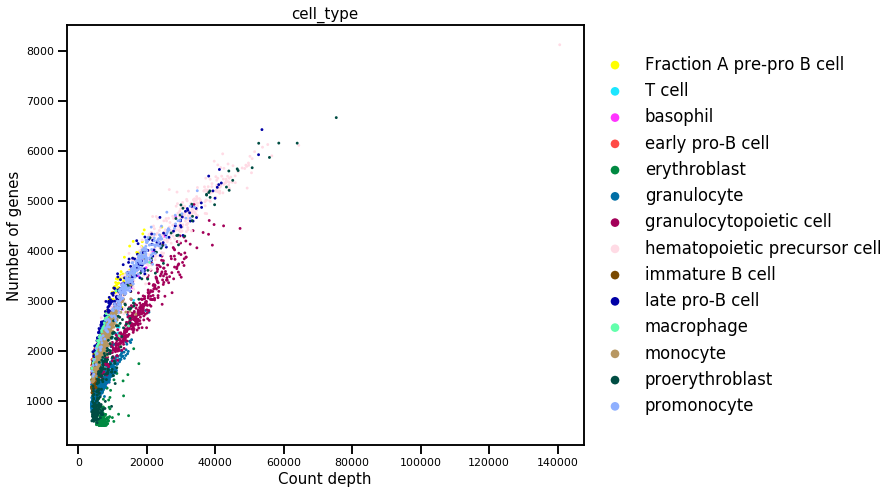

Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


Mammary_Gland


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view

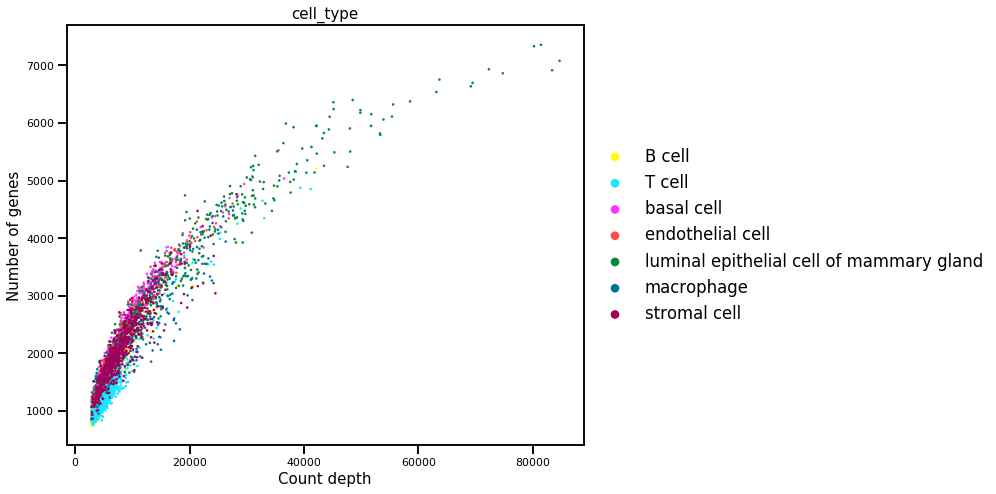

Trying to set attribute `.obs` of view, making a copy.


Spleen
21 cells with cell type 'nan' removed


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
... storing 'tissue' as categorical
Trying to set attribute `.obs` of view, making a copy.
Observation names are not unique. To make them unique, call `.obs_names_ma

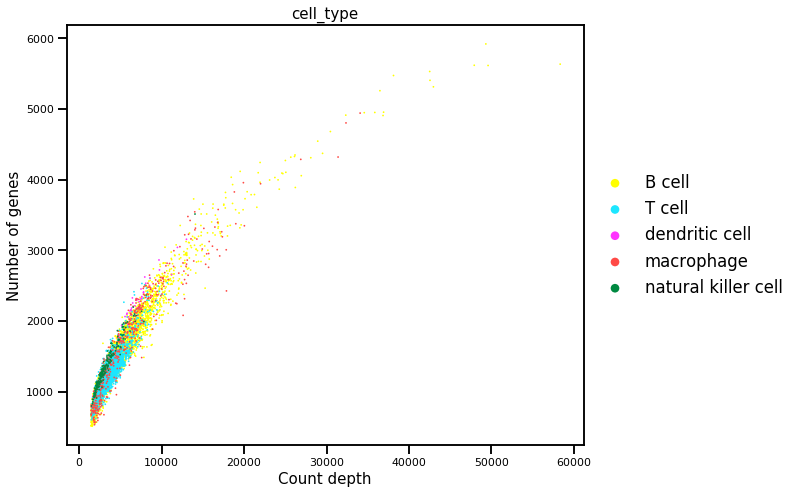

In [15]:
for tissue in adatas.keys():
    adata = adatas[tissue]
    print(tissue)
    
    # remove cells that are annotated as "nan"
    size_before = adata.n_obs
    adata = adata[adata.obs["cell_type"].notnull()]
    if size_before != adata.n_obs:
        print(f"{size_before - adata.n_obs} cells with cell type 'nan' removed")
    
    scIB.preprocessing.summarize_counts(adata)
    scIB.preprocessing.plot_QC(adata[adata.obs["tissue"] == tissue], color="cell_type")
    #sc.pl.violin(adata[adata.obs["tissue"] == tissue], keys=['n_genes', 'n_counts'],
    #         jitter=0.4, multi_panel=True)

In [16]:
for tissue in adatas.keys():
    adata = adatas[tissue]
    print(tissue)
    adata.write(f"{data_dir}droplet/{tissue}_raw.h5ad")

... storing 'tissue' as categorical
... storing 'channel' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Thymus


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Kidney


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Limb_Muscle
Lung


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Bladder


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Liver


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Marrow


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Mammary_Gland


... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'sex' as categorical
... storing 'cell_type' as categorical


Spleen
